In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
os.listdir("../data/ml-25m/")

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

In [3]:
path = "../data/ml-25m/"

movies = pd.read_csv(path + "movies.csv")
links = pd.read_csv(path + "links.csv")
ratings = pd.read_csv(path + "ratings.csv")
tags = pd.read_csv(path + "tags.csv")
genome_scores = pd.read_csv(path + "genome-scores.csv")
genome_tags = pd.read_csv(path + "genome-tags.csv")

In [4]:
print(f"Dataset shape: {ratings.shape}")
print(f"Users: {len(ratings.userId.unique())}")
print(f"Movies: {len(ratings.movieId.unique())}")

Dataset shape: (25000095, 4)
Users: 162541
Movies: 59047


In [5]:
DEBUG = False

if DEBUG:
    ratings = ratings.loc[ratings.userId.isin(np.random.choice(ratings.userId.unique(), size=1000, replace=False))]

In [6]:
print(f"Dataset shape: {ratings.shape}")
print(f"Users: {len(ratings.userId.unique())}")
print(f"Movies: {len(ratings.movieId.unique())}")

Dataset shape: (25000095, 4)
Users: 162541
Movies: 59047


In [7]:
ratings = ratings.join(movies['title'], on ="movieId")

In [8]:
ratings.head()

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Quiz Show (1994)
1,1,306,3.5,1147868817,Rent-a-Kid (1995)
2,1,307,5.0,1147868828,Relative Fear (1994)
3,1,665,5.0,1147878820,Some Folks Call It a Sling Blade (1993)
4,1,899,3.5,1147868510,Gone with the Wind (1939)


In [9]:
rating_counts = ratings.groupby('rating').count().iloc[:, 0]

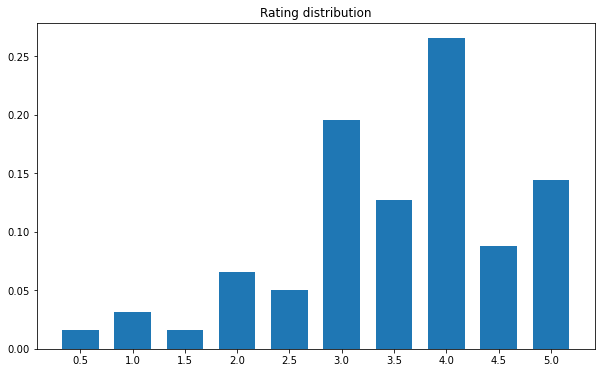

In [10]:
plt.figure(figsize=(10,6))
plt.bar(rating_counts.index, rating_counts / sum(rating_counts), width = 0.35)
plt.title("Rating distribution")
plt.xticks(rating_counts.index)

plt.show()

# Recommender systems - surprise package

In [11]:
from surprise import Reader, Dataset
import surprise

In [12]:
testIds = np.random.choice(ratings.userId.unique(), size = 20000, replace = False)

In [13]:
train_df = ratings.loc[-ratings.userId.isin(testIds)]
test_df = ratings.loc[ratings.userId.isin(testIds)]

del ratings

In [14]:
reader = Reader(rating_scale=(1, 5))
test_df = Dataset.load_from_df(test_df[['userId', 'movieId', 'rating']], reader).build_full_trainset()

In [22]:
trainsetSizes = [10, 100]
algos = {
    'SVD': surprise.SVD(),
    'NMF': surprise.NMF(),
    'k-NN': surprise.KNNBasic(),
    'k-NN with means': surprise.KNNWithMeans(),
    'CoClustering': surprise.CoClustering(),
    'SlopeOne': surprise.SlopeOne(),
}

In [23]:
algos

{'SVD': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x15692f1ef10>,
 'NMF': <surprise.prediction_algorithms.matrix_factorization.NMF at 0x15692f1e250>,
 'k-NN': <surprise.prediction_algorithms.knns.KNNBasic at 0x15692f1eeb0>,
 'k-NN with means': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x15692f1e370>,
 'CoClustering': <surprise.prediction_algorithms.co_clustering.CoClustering at 0x15692f1eca0>,
 'SlopeOne': <surprise.prediction_algorithms.slope_one.SlopeOne at 0x15692f1e280>}

In [24]:
for trainsetSize in trainsetSizes:
    
    print(f"Trainset size: {trainsetSize}")

    df_tmp = train_df.loc[train_df.userId.isin(np.random.choice(train_df.userId.unique(), size = trainsetSize, replace=False))]
    
    
    df_tmp = Dataset.load_from_df(df_tmp[['userId', 'movieId', 'rating']], reader)
    df_tmp = df_tmp.build_full_trainset()    
    
    for algo_name, algo in algos.items():
        
        print(f"Algorithm: {algo_name}")
        
        algo.fit(df_tmp)
        predictions = algo.test(test_df.build_testset())
        print(surprise.accuracy.rmse(predictions))

Trainset size: 10
Algorithm: SVD
RMSE: 1.0578
1.0578069694596413
Algorithm: NMF
RMSE: 1.0641
1.0641228420848268
Algorithm: k-NN
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0641
1.0641228420848268
Algorithm: k-NN with means
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0641
1.0641228420848268
Algorithm: CoClustering
RMSE: 1.0641
1.0641228420848268
Algorithm: SlopeOne
RMSE: 1.0641
1.0641228420848268
Trainset size: 100
Algorithm: SVD
RMSE: 1.0268
1.0267741327425095
Algorithm: NMF
RMSE: 1.0603
1.060341603487599
Algorithm: k-NN
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0603
1.060341603487599
Algorithm: k-NN with means
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0603
1.060341603487599
Algorithm: CoClustering
RMSE: 1.0603
1.060341603487599
Algorithm: SlopeOne
RMSE: 1.0603
1.060341603487599
